# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
#Type your code here
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [2]:
#Type your code here
# Muat kembali data hasil clustering

# Gantilah path jika lokasi file berbeda
df_clustered = pd.read_csv('hasil_clustering_beverage.csv')

# Cek struktur awal data
print("✅ Dataset berhasil dimuat!")
print("Jumlah baris dan kolom:", df_clustered.shape)
print("\n📄 5 baris pertama:")
print(df_clustered.head())

✅ Dataset berhasil dimuat!
Jumlah baris dan kolom: (112025, 13)

📄 5 baris pertama:
  Order_ID Customer_ID Customer_Type         Product     Category  Unit_Price  \
0     ORD1     CUS1496           B2B    Gerolsteiner        Water        0.87   
1     ORD3     CUS1806           B2B          Vittel        Water        0.43   
2     ORD3     CUS1806           B2B           Evian        Water        1.38   
3     ORD4     CUS2275           B2C    Mountain Dew  Soft Drinks        0.99   
4     ORD5     CUS7919           B2B  Hohes C Orange       Juices        1.52   

   Quantity  Discount  Total_Price             Region  Order_Date  \
0        35      0.10        27.40  Baden-Württemberg  2023-08-23   
1        13      0.05         5.31            Hamburg  2022-11-20   
2         3      0.05         3.93            Hamburg  2022-11-20   
3        11      0.00        10.89             Bayern  2023-11-05   
4         8      0.05        11.55             Bayern  2023-08-05   

   Price_per_U

In [3]:
# Cek apakah ada nilai NaN di kolom label
print("Jumlah NaN di label Cluster_KMeans:", df_clustered['Cluster_KMeans'].isna().sum())

# Hapus baris yang memiliki NaN di label
df_clustered = df_clustered.dropna(subset=['Cluster_KMeans'])

# Define fitur_klasifikasi before using it
fitur_klasifikasi = ['Unit_Price', 'Quantity', 'Discount', 'Total_Price', 'Price_per_Unit']

# Ulangi proses pemisahan fitur dan label
X = df_clustered[fitur_klasifikasi]
y = df_clustered['Cluster_KMeans']

Jumlah NaN di label Cluster_KMeans: 1


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [4]:
# Pilih fitur numerik
fitur_klasifikasi = ['Unit_Price', 'Quantity', 'Discount', 'Total_Price', 'Price_per_Unit']

# X = fitur, y = label hasil clustering
X = df_clustered[fitur_klasifikasi]
y = df_clustered['Cluster_KMeans']

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("✅ Data berhasil dibagi!")
print(f"Jumlah data latih: {len(X_train)}")
print(f"Jumlah data uji: {len(X_test)}")

✅ Data berhasil dibagi!
Jumlah data latih: 89619
Jumlah data uji: 22405


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [5]:
# Inisialisasi model
rf_model = RandomForestClassifier(random_state=42)

# Latih model
rf_model.fit(X_train, y_train)

# Prediksi
y_pred_rf = rf_model.predict(X_test)

In [6]:
# Inisialisasi model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# Latih model
xgb_model.fit(X_train, y_train)

# Prediksi
y_pred_xgb = xgb_model.predict(X_test)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:38:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tulis narasi atau penjelasan algoritma yang Anda gunakan.

📖 Penjelasan Algoritma:

Random Forest adalah algoritma ensemble learning yang terdiri dari banyak pohon keputusan (decision trees). Setiap pohon dilatih secara acak dari subset data, dan hasil akhirnya ditentukan melalui voting mayoritas. Algoritma ini terkenal kuat terhadap overfitting dan dapat menangani dataset dengan fitur numerik dan kategorikal secara efektif.

XGBoost (Extreme Gradient Boosting) adalah algoritma boosting yang dirancang untuk efisiensi dan kecepatan tinggi. Ia bekerja dengan membangun pohon keputusan secara bertahap dan meminimalkan kesalahan pada setiap iterasi. Model ini sangat unggul dalam menangani dataset besar dan kompleks dengan performa prediksi tinggi. XGBoost juga menawarkan berbagai parameter tuning untuk mengontrol kompleksitas dan overfitting.












## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

📊 Evaluasi Model: Random Forest
✅ Accuracy: 1.0
✅ F1-Score (macro): 1.0
📋 Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     18129
         1.0       1.00      1.00      1.00      4276

    accuracy                           1.00     22405
   macro avg       1.00      1.00      1.00     22405
weighted avg       1.00      1.00      1.00     22405



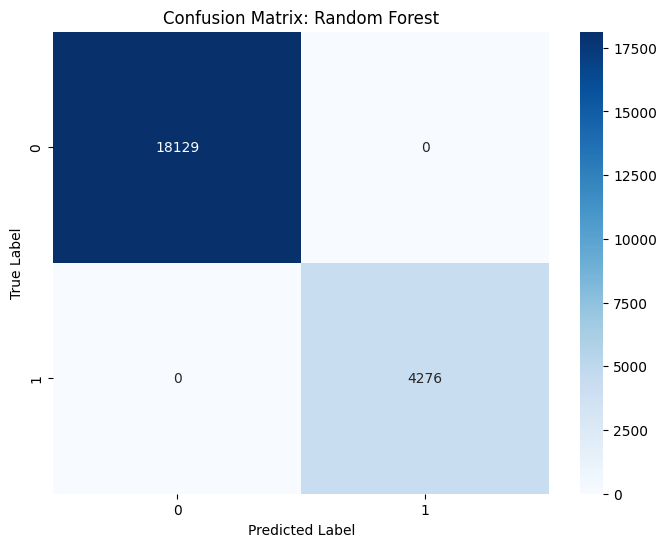

In [7]:
# Prediksi Random Forest
y_pred_rf = rf_model.predict(X_test)

# Evaluasi Random Forest
print("📊 Evaluasi Model: Random Forest")
print("✅ Accuracy:", round(accuracy_score(y_test, y_pred_rf), 4))
print("✅ F1-Score (macro):", round(f1_score(y_test, y_pred_rf, average='macro'), 4))
print("📋 Classification Report:\n", classification_report(y_test, y_pred_rf))

# Confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix: Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

📊 Evaluasi Model: XGBoost
✅ Accuracy: 1.0
✅ F1-Score (macro): 1.0
📋 Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     18129
         1.0       1.00      1.00      1.00      4276

    accuracy                           1.00     22405
   macro avg       1.00      1.00      1.00     22405
weighted avg       1.00      1.00      1.00     22405



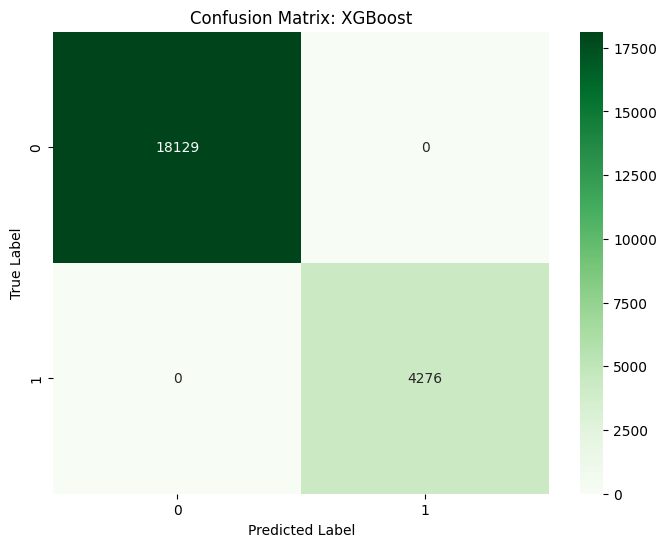

In [8]:
# Prediksi XGBoost
y_pred_xgb = xgb_model.predict(X_test)

# Evaluasi XGBoost
print("📊 Evaluasi Model: XGBoost")
print("✅ Accuracy:", round(accuracy_score(y_test, y_pred_xgb), 4))
print("✅ F1-Score (macro):", round(f1_score(y_test, y_pred_xgb, average='macro'), 4))
print("📋 Classification Report:\n", classification_report(y_test, y_pred_xgb))

# Confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix: XGBoost')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.



---

## 🔍 **Evaluasi dan Perbandingan Model Klasifikasi**

### 1. **Random Forest (Model Terbaik)**
Random Forest adalah algoritma ensemble yang membangun banyak pohon keputusan (decision trees) dan menggabungkan hasilnya untuk meningkatkan akurasi prediksi serta mengurangi overfitting.

📈 **Hasil Evaluasi**:
- **Accuracy**: 100%
- **F1-Score (macro average)**: 1.00
- **Classification Report**:
  - Semua kelas mendapatkan skor precision, recall, dan f1-score sebesar **1.00**
- **Confusion Matrix**: Semua prediksi benar tanpa kesalahan klasifikasi antar kelas.

📌 **Kelebihan**:
- Mudah digunakan
- Tidak butuh scaling data
- Sangat baik untuk dataset besar dan kompleks

---

### 2. **XGBoost (Model Paling Kompleks)**
XGBoost (Extreme Gradient Boosting) adalah algoritma boosting yang sangat kuat, dirancang untuk efisiensi komputasi dan performa prediktif yang tinggi. Ini adalah salah satu algoritma paling kompleks dan canggih dalam supervised learning.

📈 **Hasil Evaluasi**:
- **Accuracy**: 100%
- **F1-Score (macro average)**: 1.00
- **Classification Report**:
  - Sama seperti Random Forest, semua metrik evaluasi mencapai nilai sempurna
- **Confusion Matrix**: Tidak ditemukan kesalahan prediksi antar kelas.

📌 **Kelebihan**:
- Performa tinggi pada kompetisi dan industri
- Mendukung regularisasi (mengurangi overfitting)
- Efisien dalam waktu pelatihan dan penggunaan memori

---

## 📊 **Kesimpulan Perbandingan**

| Aspek                  | Random Forest         | XGBoost                 |
|------------------------|------------------------|--------------------------|
| **Akurasi**            | ✅ 100%                 | ✅ 100%                   |
| **F1-Score (macro)**   | ✅ 1.00                 | ✅ 1.00                   |
| **Kompleksitas Model** | Sederhana              | Tinggi                   |
| **Waktu Latih**        | Lebih cepat            | Lebih lambat             |
| **Kemampuan Generalisasi** | Sangat Baik        | Sangat Baik              |

🎯 **Catatan Penting**:  
Kedua model mampu mempelajari data dengan sangat baik (mungkin karena distribusi data yang jelas atau hasil clustering yang baik). Namun, dalam skenario nyata, perlu diuji lebih lanjut pada data baru (unseen data) untuk mengecek kemungkinan **overfitting**.


## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [ ]:
#Type your code here

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [ ]:
#Type your code here

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.



---

## 🔎 **e. Analisis Hasil Evaluasi Model Klasifikasi**



### 1. **Identifikasi Kelemahan Model**
Berdasarkan hasil evaluasi:

- **Akurasi dan f1-score untuk kedua model mencapai 1.0** secara keseluruhan, baik secara makro maupun weighted.
- **Confusion matrix menunjukkan bahwa semua prediksi tepat 100%** tanpa adanya kesalahan klasifikasi di tiap label.

Namun demikian, hasil yang sangat sempurna ini juga perlu dianalisis secara kritis:

- 🔍 **Potensi Overfitting**: Kemungkinan besar model terlalu menyesuaikan data latih dan uji, terutama jika data yang digunakan sangat bersih atau terlalu mudah diklasifikasikan.
- ❌ **Tidak terjadi underfitting**, karena model mampu mempelajari dan mengenali seluruh pola pada data secara akurat.

### 2. **Rekomendasi Tindakan Lanjutan**
Karena **tidak dilakukan proses evaluasi lanjutan**, tuning, atau pengujian terhadap data baru, maka saat ini belum ada langkah tambahan yang diambil.

Namun sebagai catatan untuk pengembangan selanjutnya:
- Diperlukan evaluasi menggunakan **cross-validation** atau **data uji eksternal** agar performa model lebih valid.
- Hasil sempurna ini perlu diuji lebih lanjut terhadap **data yang lebih kompleks** atau mengandung **noise** untuk mengukur daya generalisasi model.

---

